In [1]:
'''
4. Threshold의 변화에 따른 모델 성능
이전 스텝의 암환자 분류 모델를 떠올려 봅시다.
우리가 학습시킨 모델의 출력이 일정 이상 기준선(Threshold)를 넘어가면 우리는 양성이라고 분류하게 될 것입니다.
그런데 우리가 학습시킨 모델은 Recall이 높을 수록 좋은 모델입니다.

양성일 확률이 0.5가 넘으면 양성이라고 분류하게 하는 것보다는
양성일 확률이 0.3만 넘으면 양성이라고 분류하도록 해보면 어떨까요? 모델의 파라미터 등은 전혀 변한 것이 없는데,
모델의 출력값을 해석하는 방식만 다르게 해도 이 모델은 전혀 다른 성능을 가지게 됩니다.
따라서 이 모델의 성능척도 값도 달라지게 될 것입니다.

이것은, 모델의 성능이라는 것이 F1 score같은 숫자 하나로만 규정될 수 있는 게 아니라는 것을 의미하게 됩니다.
(물론 모델 출력의 해석방식이 고정적으로 주어진다면 F1 score는 유효한 Metric이 됩니다.)
이렇게 Threshold가 달라지는 것을 고려하여 전체적인 모델의 성능을 평가하는 방법으로
PR(Precision and Recall) 커브와 ROC(Receiver Operating Characteristic) 커브를
그려보는 두가지 방법이 있습니다.

Threshold의 변화에 따라 모델 성능이 달라지는 상황을 간단한 분류 모델 예제를 통해 살펴 봅시다.

실습에 사용하기위해 사이킷런에서 제공하는 붓꽃 데이터를 가져오도록 하겠습니다.
'''

from sklearn import datasets

from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

print(X.shape)  # 4개의 feature를 가진 150개의 데이터입니다.

(150, 4)


In [2]:
'''
Task의 재구성
붓꽃 분류 예제는 상당히 간단하기 때문에, 그대로 훈련시키면 거의 100%에 가까운 성능을 냅니다.
성능 평가를 공부하는 지금으로서는 조금 재미가 없겠지요?

일부러 데이터에 잡음(noise)을 추가해 성능을 낮추어 보겠습니다.
랜덤한 값으로 이루어진 200 * n_features, 즉 800개의 컬럼을 매 데이터마다 추가합니다.
'''

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

print(X.shape)  # 804개의 feature를 가진 150개의 데이터가 되었습니다.

(150, 804)


In [3]:
'''
원래 붓꽃의 데이터는 총 3가지의 라벨로 나뉩니다.
하지만 분석을 간단히 하기 위해 여기서는 양성/음성으로 나뉘는
이진 분류(binary classification) 문제로 줄여, 2개의 라벨 간 분류만 해보겠습니다.
'''

#- 0, 1 라벨에 속하는 붓꽃 샘플만 사용하도록 제한합니다.
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

print("훈련, 테스트 셋에 사용된 라벨의 종류: {} ".format( set(y_test)))
print("훈련 데이터 shape  :", X_train.shape)
print("테스트 데이터 shape :", X_test.shape)

훈련, 테스트 셋에 사용된 라벨의 종류: {0, 1} 
훈련 데이터 shape  : (50, 804)
테스트 데이터 shape : (50, 804)


In [4]:
'''
모델 학습
2개의 라벨로 나뉜 데이터를 가지고,
SVM(Support Vector Machine)으로 모델을 구성하여 학습시킨 후
test 데이터를 넣어 정확도를 확인해보도록 하겠습니다.
'''

from sklearn import svm

classifier = svm.SVC(kernel='poly', random_state=random_state)
classifier.fit(X_train, y_train)

classifier.score(X_test,y_test)

0.48

In [5]:
'''
classifier.score() 함수는 테스트데이터에 대한 평균 정확도(Accuracy)를 리턴합니다.
0.5에 가까운 수준의 binary classifier라니, 전혀 분류 성능이 없다고 봐야겠군요.
이번에는 SVM의 커널을 바꾸어 보겠습니다.
'''

classifier = svm.SVC(kernel='linear', random_state=random_state)
classifier.fit(X_train, y_train)

classifier.score(X_test,y_test)

0.8

In [6]:
'''
이번에는 70% 정도의 정확도가 나왔습니다.
SVM은 아주 복잡하면서도 아름다운 수학적 배경을 갖춘 분류모델로 알려져 있습니다.
SVM 자체를 이해하는 것은 오늘의 범위를 넘어서기 때문에
일단은 SVM 모델의 성능을 평가하는 데 집중하도록 하겠습니다.
'''

classifier.predict(X_test)

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1])

In [7]:
y_test

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0])

In [8]:
'''
classifier.predict() 리턴값과 y_test를 비교해 보았습니다.
모델 뒤에 Softmax가 있어서 확률값을 출력하는 Logistic Regression 모델과는 달리,
SVM에서 별도로 제공하는 decision_function() 함수가 존재합니다.
이 함수값은 ( -1, 1) 범위값을 가지는데, 0보다 작으면 음성(label=0),
0보다 크면 양성(label=1)으로 분류하게 됩니다.
'''

y_score = classifier.decision_function(X_test)
print(y_score)

[-0.29512751  0.28798352  0.17635465  0.19056886  0.38391605 -0.30841065
 -0.10084254 -0.23481309  0.18576987 -0.36011033 -0.15726747 -0.25714889
 -0.14979669  0.02063898  0.04509171 -0.17239443  0.07287957 -0.0689103
 -0.13452462 -0.30697712  0.25404241 -0.28916471 -0.52061453  0.25252233
  0.02177777 -0.10980907  0.37468422  0.35303004 -0.6211302  -0.42920064
 -0.14770647  0.00593404 -0.34735296  0.32245409 -0.19439024  0.1288847
 -0.0320947  -0.23008604 -0.10135548 -0.46962186  0.05184235  0.0609688
  0.05632596  0.44769206 -0.38804349  0.24704844  0.16063684  0.0144203
 -0.03136574  0.11179177]


In [9]:
'''
그럼 여기서 confusion_matrix를 계산해 보겠습니다.
실제 정답값 y_test와 y_pred를 비교해 보면 다음과 같은 결과가 얻어집니다.
confusion_matrix는 [[TN, FP], [FN, TP]]의 형태로 출력됩니다.
사이킷런에서는 classification_report이라는 함수를 통해
confusion_matrix에서 얻어진 TN, FP, FN, TP 값을 토대로
Precision, Recall, F1-score 등의 평가척도값을 계산해 줍니다.
'''

from sklearn.metrics import confusion_matrix, classification_report

y_pred = classifier.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred)
print(rpt_result)

[[20  4]
 [ 6 20]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.83      0.77      0.80        26

    accuracy                           0.80        50
   macro avg       0.80      0.80      0.80        50
weighted avg       0.80      0.80      0.80        50



In [10]:
'''
방금 우리는 decision_function 값이 0보다 큰 것을 양성으로 분류했습니다.
만약 양성 분류 기준을 좀더 확대해서 -0.1보다 큰 것을 양성으로 분류한다면 어떻게 될까요?
'''

y_pred_new_threshold = classifier.decision_function(X_test) > -0.1
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[18  6]
 [ 5 21]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.77        24
           1       0.78      0.81      0.79        26

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.78      0.78      0.78        50



In [11]:
'''
어떻습니까? 양성 분류 기준을 확대했기 때문에, Recall이 0.77에서 0.81로 상승했습니다.
하지만 전체적인 F1-score는 0.80에서 0.79로 소폭 하락했습니다.
하지만 태스크의 특성에 따라서는 이것이 오히려 더 좋은 결과를 가져올지도 모르겠습니다.

Threshold 값을 조금씩 바꿔보면서 평가척도값이 어떻게 변하는지 확인해 봅시다.
'''

y_pred_new_threshold = classifier.decision_function(X_test) > -0.2
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[12 12]
 [ 2 24]]
              precision    recall  f1-score   support

           0       0.86      0.50      0.63        24
           1       0.67      0.92      0.77        26

    accuracy                           0.72        50
   macro avg       0.76      0.71      0.70        50
weighted avg       0.76      0.72      0.71        50



In [12]:
y_pred_new_threshold = classifier.decision_function(X_test) > 0.1
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[23  1]
 [12 14]]
              precision    recall  f1-score   support

           0       0.66      0.96      0.78        24
           1       0.93      0.54      0.68        26

    accuracy                           0.74        50
   macro avg       0.80      0.75      0.73        50
weighted avg       0.80      0.74      0.73        50



In [13]:
y_pred_new_threshold = classifier.decision_function(X_test) > 0.2
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[24  0]
 [17  9]]
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        24
           1       1.00      0.35      0.51        26

    accuracy                           0.66        50
   macro avg       0.79      0.67      0.63        50
weighted avg       0.80      0.66      0.62        50



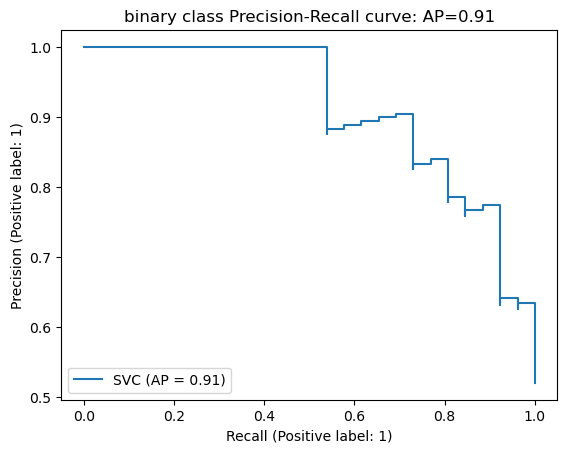

In [14]:
'''
5. Precision-Recall 커브
이전 스텝에서 분류모델의 분류기준(Threshold)을 변경함에 따라 동일한 모델에서도
Precision, Recall 등 평가척도 값이 달라지는 것을 확인했습니다.
PR(Precision-Recall) 커브는 Recall을 X축, Precision을 Y축에 놓고
Threshold 변화에 따른 두 값의 변화를 그래프로 그린 것입니다.

위 사례의 PR 커브를 그려 보겠습니다.
'''

from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

disp = PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test)
disp.ax_.set_title('binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(disp.average_precision))

plt.show()

In [15]:
'''
위 그림을 보면 Precision과 Recall 사이의 트레이드오프 관계를 확인할 수 있습니다.
Threshold값에 따라 우리가 얻게 되는 Precision, Recall 값은 저 그래프상의 어딘가가 될 것입니다.
물론 우리가 원하는 값은 Precision이든 Recall이든 모두 1에 가깝기를 원합니다.
이상적으로는 그래프가 (1, 1)에 찍히면 좋겠습니다만, 가급적 위 그래프가 (1, 1)에 근접하도록 그려지길 바랍니다.

그래서 Threshold 값에 무관하게 모델의 전체적인 성능을 평가하는 방법으로,
위 PR 커브 아래쪽 면적을 계산하는 방법이 있습니다. 이것을 AUC(Area Under Curve) 값이라고 합니다.
PR AUC를 계산하는 방법으로 다음과 같이 사이킷런에서 제공하는 average_precision_score 함수를 사용합니다.

위 수식의 특성을 살펴보면, average_precision_score(AP) 값은,
n 값을 무한히 크게 한다면 아주 작은 Recall 구간에 대해 Pn 값을 적분하는 것과 같게 됩니다.
그러므로 PR 커브의 아래쪽 면적인 PR AUC와 같은 의미가 되겠군요.
하지만 사이킷런 문서에서는 average_precision_score와 PR AUC가 구현 측면에서 약간 다르다고 설명하고 있습니다.
두 개념이 의미적으로 비슷하게 사용될 수 있다고만 이해하면 될 것 같습니다.
'''

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('평균 precision-recall score: {0:0.2f}'.format(
      average_precision))

평균 precision-recall score: 0.91


In [16]:
'''
average_precision_score 값은 최대 1이 될 수 있을 것입니다.
위에서는 0.91이 나왔군요. 그렇다면 모델을 바꿔 보면 이 값이 어떻게 달라질지 궁금해집니다.
우리는 이전 스텝에서 SVM의 커널을 'poly'로 주었을 때 Accuracy가 매우 낮았던 것을 기억합니다.
이때의 average_precision_score 값이 어떻게 될지 직접 구현해서 확인해 봅시다.

참고로, SVM의 커널의 종류는 다음과 같습니다.
'''

# Q. 모델을 SVM의 'poly' 커널을 사용하여 average_precision_score를 구하세요.
from sklearn.metrics import average_precision_score

classifier = svm.SVC(kernel='poly', random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('평균 precision-recall score: {0:0.2f}'.format(
      average_precision))

평균 precision-recall score: 0.90


Text(0.5, 1.0, 'binary class Precision-Recall curve: AP=0.90')

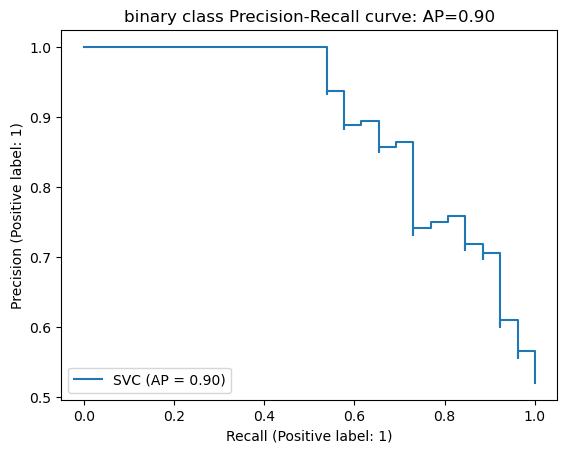

In [17]:
disp = PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test)
disp.ax_.set_title('binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [18]:
'''
6. ROC 커브
ROC(Receiver Operating Characteristic Curve) 는 수신자 조작 특성 곡선이라는 단어로 표현할 수 있습니다.
ROC는 앞서 계산해보았던 Confusion Matrix 수치를 활용해, 분류기의 분류 능력을 그래프로 표현하는 방법입니다.
물론 이 그래프도 PR 커브와 마찬가지로 분류기의 Threshold 값의 변화에 따라
Confusion Matrix에 생기는 변화로 인해 그려지는 것입니다.

ROC 예시 곡선
ROC를 그리는 축인 TP Rate과 FP Rate은 Precision, Recall과 비슷해 보이지만 조금 다른 개념입니다.

TP Rate과 FP Rate은 다음과 같이 계산합니다.

위 그림은 ROC 그래프의 예시이며, 점선이 ROC 입니다.

TP Rate(TPR)의 수식을 잘 보면 실은 우리가 잘 아는 Recall과 같은 것입니다. FP Rate는 1-Specificity라고 소개되어 있는데, Specificity라는 것은 
TN / (TN + FP) 이 되므로, 실은 음성 샘플에 대한 Recall이라고 볼 수 있습니다.
'''

from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print("🌜    .\n·   *\n  *   *\n🌲 🐕 🌳")

🌜    .
·   *
  *   *
🌲 🐕 🌳


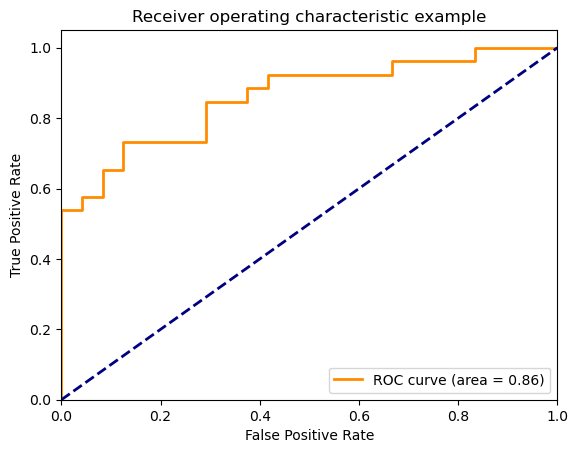

auc result:0.8605769230769231


In [19]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print(f"auc result:{roc_auc}")

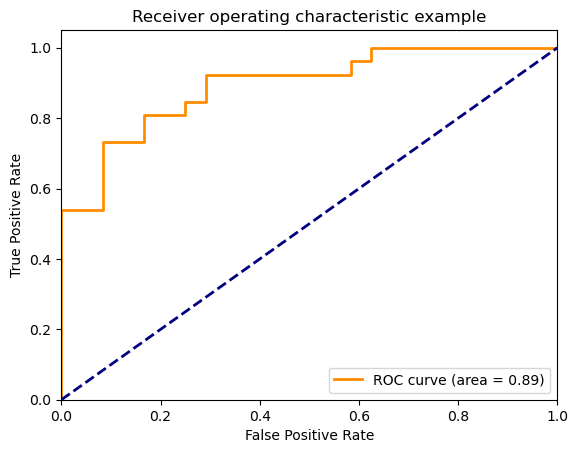

auc result:0.8926282051282052


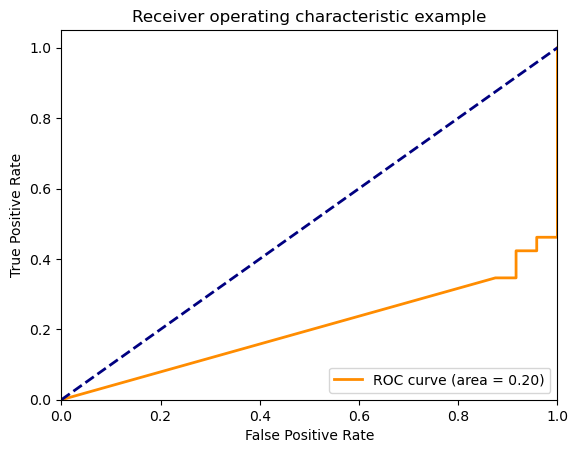

auc result:0.20272435897435895


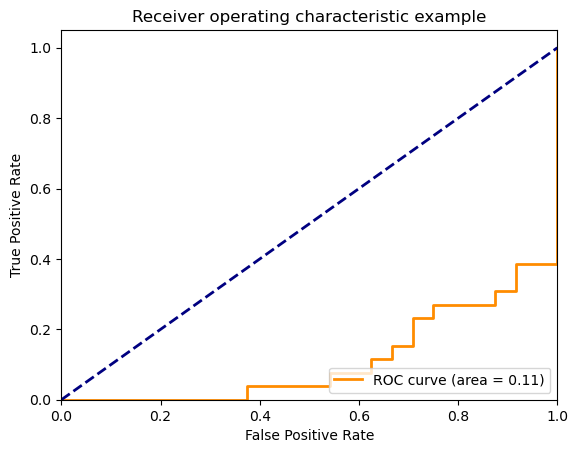

auc result:0.1121794871794872


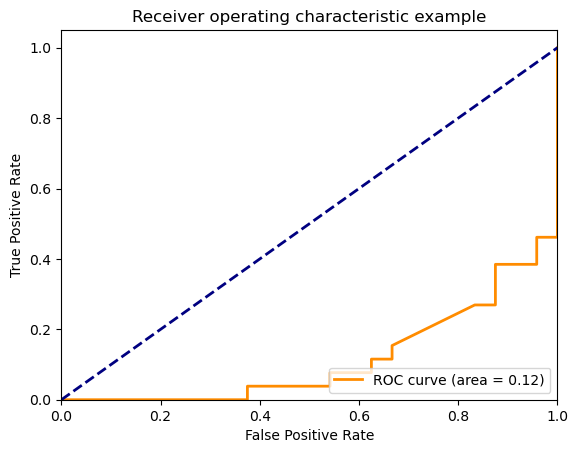

auc result:0.11538461538461539


In [20]:
'''
아주 이상적으로 Precision과 Recall이 전부 1이 되는 완벽한 모델이라면 ROC 커브에서는 어디에 점이 찍힐까요?
네, 바로 (0, 1)일 것입니다. 양성과 음성에 대한 Recall이 모두 1이 될 테니 TPR은 1, FPR은 0이 될 것입니다.

몇가지 극단적인 경우를 생각해 봅시다. 모델이 모든 샘플에 대해 양성이라고 분류한다면 어떨까요?
이땐 이 분류기가 (1, 1)에 찍힐 것입니다.
반대로 모든 샘플에 대해 음성이라고 분류한다면 이 분류기는 (0, 0)에 찍힐 것입니다.

이번엔 완벽한 랜덤 분류기를 가정해 봅시다.
이 분류기는 양성이든 음성이든 무관하게 p의 확률로 양성이라고 분류할 것입니다.
이 랜덤분류기의 Recall은 p가 될 것입니다.
음성에 대한 Recall도 p가 될 테니 이 분류기는 (p, 1-p)에 찍힐 것입니다.

위 그래프에서 (0, 0)과 (1, 1)을 잇는 파란 점선은 바로 위와 같은 극단적인 경우들만 모아놓은 경우입니다.
그래서 의미있는 분류기라면 적어도 이 파란 점선보다는 위쪽에 그려져야 하며,
가급적 (0, 1)에 가깝게 그려질 수록 우수한 분류기가 됩니다.
그러므로 ROC AUC가 클수록 상대적으로 좋은 성능의 모델이라고 할 수 있을 것입니다.

ROC AUC 값도 최대 1이 될 수 있을 것입니다. 위에서는 0.89 정도가 나왔군요.
이번에도 SVM 커널의 종류를 바꿔 가며 ROC 커브를 그리고 ROC AUC 값을 구하는 코드를 직접 작성해 봅시다.
'''

# SVM 커널의 종류를 바꿔 가며 ROC 커브를 그리고 ROC AUC 값을 구하는 코드를 직접 작성해보세요.

from sklearn import svm

# SVM 커널 변경
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    # SVM 모델 생성 및 학습
    clf = svm.SVC(kernel=kernel, probability=True, random_state=42)
    clf.fit(X_train, y_train)

    # 커널별 예측 점수 계산
    y_score = clf.predict_proba(X_test)[:, 1]

    # ROC 커브 및 AUC 계산
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    print(f"auc result:{roc_auc}")